In [ ]:
!unzip /content/drive/MyDrive/GTSRB-Test/GTSRB.zip -d /content/GTSRB

Streaming output truncated to the last 5000 lines.
  inflating: /content/GTSRB/train/5/00005_00053_00010.png  
  inflating: /content/GTSRB/train/5/00005_00053_00011.png  
  inflating: /content/GTSRB/train/5/00005_00053_00012.png  
  inflating: /content/GTSRB/train/5/00005_00053_00013.png  
  inflating: /content/GTSRB/train/5/00005_00053_00014.png  
  inflating: /content/GTSRB/train/5/00005_00053_00015.png  
  inflating: /content/GTSRB/train/5/00005_00053_00016.png  
  inflating: /content/GTSRB/train/5/00005_00053_00017.png  
  inflating: /content/GTSRB/train/5/00005_00053_00018.png  
  inflating: /content/GTSRB/train/5/00005_00053_00019.png  
  inflating: /content/GTSRB/train/5/00005_00053_00020.png  
  inflating: /content/GTSRB/train/5/00005_00053_00021.png  
  inflating: /content/GTSRB/train/5/00005_00053_00022.png  
  inflating: /content/GTSRB/train/5/00005_00053_00023.png  
  inflating: /content/GTSRB/train/5/00005_00053_00024.png  
  inflating: /content/GTSRB/train/5/00005_00053_0

Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
import cv2
import tensorflow
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Declare and Assign variables

In [ ]:
# Assigning data path
data_dir = '/content/GTSRB'
train_path = '/content/GTSRB/Train'

# Resizing the images to 30x30x3
height = 30
width = 30
channels = 3

#find total classes in training set
NUM_CATEGORIES = len(os.listdir(train_path)) 
NUM_CATEGORIES

43

Training Set Preparation

In [ ]:
# Declaring data and labels

data = []
labels = []

for i in range(NUM_CATEGORIES):
    path = train_path + '/' + str(i)
    images = os.listdir(path)

    for img in images:
        try:
            image = cv2.imread(path + '/' + img)
            fromarray = Image.fromarray(image, 'RGB')
            resized_image = fromarray.resize((height, width))
            resized_image = np.array(resized_image)
            data.append(resized_image)
            labels.append(i)
        except:
            print("Error: " + img)

# Changing the list to numpy array
data = np.array(data)
labels = np.array(labels)

print(data.shape, labels.shape)

(39209, 30, 30, 3) (39209,)


Split Training Set 

In [ ]:
#Split Train Test dataset
print(data.shape,labels.shape)

X_train, X_test, Y_train, Y_test = train_test_split(data,labels,test_size=0.2,random_state=6, shuffle=True)

#normalize input between 0 - 1
X_train = X_train/255 
X_test = X_test/255

print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


One hot encoding

In [ ]:
#one hot encoding
Y_train=to_categorical(Y_train,NUM_CATEGORIES)
Y_test=to_categorical(Y_test,NUM_CATEGORIES)

print(Y_train.shape,Y_test.shape)

(31367, 43) (7842, 43)


Model Building

In [ ]:
# Building model

model = Sequential()

model.add(BatchNormalization(input_shape=(height,width,channels)))
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(2,2)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=32, kernel_size=(3,3)))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=48, kernel_size=(3,3)))

model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25))

model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(filters=48, kernel_size=(3,3)))

model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(rate=0.25))

model.add(BatchNormalization())
model.add(Activation('relu')) 

model.add(Flatten()) 
model.add(Dense(512)) 

model.add(BatchNormalization()) 
model.add(Activation('relu')) 
model.add(Dropout(rate=0.5)) 
model.add(Dense(NUM_CATEGORIES, activation='softmax')) 

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_6 (Batch (None, 30, 30, 3)         12        
_________________________________________________________________
activation_6 (Activation)    (None, 30, 30, 3)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
activation_7 (Activation)    (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 12, 12, 32)       

"\nmodel = Sequential()\n\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape=(32,32,3)))\n\nmodel.add(MaxPool2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))\n\nmodel.add(MaxPool2D(pool_size=(2, 2)))\n\nmodel.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))\n\nmodel.add(MaxPool2D(pool_size=(2, 2)))\n\nmodel.add(Flatten())\n\nmodel.add(Dense(120, activation='relu')) \n\nmodel.add(Dense(84, activation='relu')) \n\nmodel.add(Dense(NUM_CATEGORIES, activation='softmax')) \n\nmodel.summary()\n"

Data Augmentation

In [ ]:
# Data Augmentation - to increase model accuracy

aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

Model Compiling

In [ ]:
# Compiling model

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model Fitting

In [ ]:
batch_size = 32
epochs = 30


history = model.fit(aug.flow(X_train,Y_train,batch_size=batch_size),
                    epochs=epochs, validation_data=(X_test, Y_test))

Epoch 1/30
981/981 [==============================] - 60s 61ms/step - loss: 2.7183 - accuracy: 0.2567 - val_loss: 1.2477 - val_accuracy: 0.6247
Epoch 2/30
981/981 [==============================] - 59s 60ms/step - loss: 1.1759 - accuracy: 0.6294 - val_loss: 0.3699 - val_accuracy: 0.8767
Epoch 3/30
981/981 [==============================] - 59s 60ms/step - loss: 0.6710 - accuracy: 0.7867 - val_loss: 0.1746 - val_accuracy: 0.9408
Epoch 4/30
981/981 [==============================] - 59s 60ms/step - loss: 0.4762 - accuracy: 0.8497 - val_loss: 0.1107 - val_accuracy: 0.9637
Epoch 5/30
981/981 [==============================] - 61s 62ms/step - loss: 0.3880 - accuracy: 0.8768 - val_loss: 0.1037 - val_accuracy: 0.9619
Epoch 6/30
981/981 [==============================] - 60s 61ms/step - loss: 0.3346 - accuracy: 0.8939 - val_loss: 0.0950 - val_accuracy: 0.9663
Epoch 7/30
981/981 [==============================] - 60s 61ms/step - loss: 0.3000 - accuracy: 0.9044 - val_loss: 0.0579 - val_accuracy:

Graph Visualization

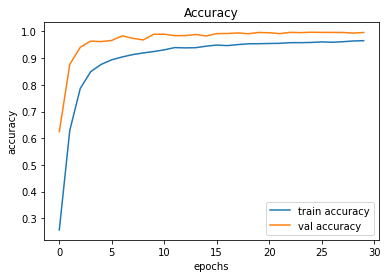

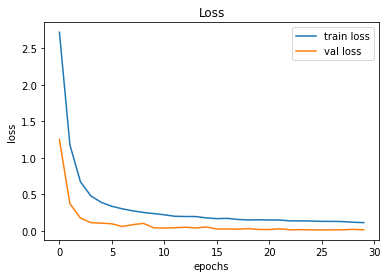

In [ ]:
# plotting graphs for accuracy and loss

plt.figure(0)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

Test Set Preparation



In [ ]:
# Preparing test set
test = pd.read_csv(data_dir + '/Test.csv')

labels = test["ClassId"].values
images = test["Path"].values
data=[]

for i in images:
    try:
        image = cv2.imread(data_dir + '/' +i)
        fromarray = Image.fromarray(image, 'RGB')
        resized_image = fromarray.resize((height, width))
        resized_image = np.array(resized_image)
        data.append(resized_image)
    except:
        print("Error in " + i)

Model Prediction

In [ ]:
# Prediction
X_pred = np.array(data)
X_pred = X_pred/255

In [ ]:
pred = np.argmax(model.predict(X_pred), axis = -1)

Test Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

Test Data accuracy:  98.00475059382423


Save Model and History

In [ ]:
!sudo pip install h5py

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("default-GTSRB-model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("default-GTSRB-model.h5")
print("Saved model to disk")

In [ ]:
import pickle 
pickle_out = open("GTSRB-hist-acc.pkl", mode = "wb") 
pickle.dump(history.history['accuracy'], pickle_out) 
pickle_out.close()

In [ ]:
pickle_out = open("GTSRB-hist-val-acc.pkl", mode = "wb") 
pickle.dump(history.history['val_accuracy'], pickle_out) 
pickle_out.close()

In [ ]:
pickle_out = open("GTSRB-hist-loss.pkl", mode = "wb") 
pickle.dump(history.history['loss'], pickle_out) 
pickle_out.close()

In [ ]:
pickle_out = open("GTSRB-hist-val-loss.pkl", mode = "wb") 
pickle.dump(history.history['val_loss'], pickle_out) 
pickle_out.close()

In [ ]:
!ls

Upload Model and History to Google Drive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)  

In [ ]:
file = drive.CreateFile()
file.SetContentFile('default-GTSRB-model.json')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('default-GTSRB-model.h5')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('GTSRB-hist-acc.pkl')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('GTSRB-hist-val-acc.pkl')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('GTSRB-hist-loss.pkl')
file.Upload()

In [ ]:
file = drive.CreateFile()
file.SetContentFile('GTSRB-hist-val-loss.pkl')
file.Upload()